In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data and Exploratory Data Analysis (EDA)


In [3]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [6]:
print(train_df.describe())

          AccountAge  MonthlyCharges   TotalCharges  ViewingHoursPerWeek  \
count  243787.000000   243787.000000  243787.000000        243787.000000   
mean       60.083758       12.490695     750.741017            20.502179   
std        34.285143        4.327615     523.073273            11.243753   
min         1.000000        4.990062       4.991154             1.000065   
25%        30.000000        8.738543     329.147027            10.763953   
50%        60.000000       12.495555     649.878487            20.523116   
75%        90.000000       16.238160    1089.317362            30.219396   
max       119.000000       19.989957    2378.723844            39.999723   

       AverageViewingDuration  ContentDownloadsPerMonth     UserRating  \
count           243787.000000             243787.000000  243787.000000   
mean                92.264061                 24.503513       3.002713   
std                 50.505243                 14.421174       1.155259   
min                

In [7]:
train_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [8]:
train_df.duplicated().sum()

0

In [9]:
train_df.nunique()

AccountAge                     119
MonthlyCharges              243787
TotalCharges                243787
SubscriptionType                 3
PaymentMethod                    4
PaperlessBilling                 2
ContentType                      3
MultiDeviceAccess                2
DeviceRegistered                 4
ViewingHoursPerWeek         243787
AverageViewingDuration      243787
ContentDownloadsPerMonth        50
GenrePreference                  5
UserRating                  243787
SupportTicketsPerMonth          10
Gender                           2
WatchlistSize                   25
ParentalControl                  2
SubtitlesEnabled                 2
CustomerID                  243787
Churn                            2
dtype: int64

In [10]:
print(test_df.info())

print(test_df.describe())

print(test_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                104480 non-null  int64  
 1   MonthlyCharges            104480 non-null  float64
 2   TotalCharges              104480 non-null  float64
 3   SubscriptionType          104480 non-null  object 
 4   PaymentMethod             104480 non-null  object 
 5   PaperlessBilling          104480 non-null  object 
 6   ContentType               104480 non-null  object 
 7   MultiDeviceAccess         104480 non-null  object 
 8   DeviceRegistered          104480 non-null  object 
 9   ViewingHoursPerWeek       104480 non-null  float64
 10  AverageViewingDuration    104480 non-null  float64
 11  ContentDownloadsPerMonth  104480 non-null  int64  
 12  GenrePreference           104480 non-null  object 
 13  UserRating                104480 non-null  f

In [11]:
#relative frequencies
churn_counts_frequency = train_df['Churn'].value_counts(normalize=True) * 100
churn_counts_frequency

0    81.876802
1    18.123198
Name: Churn, dtype: float64

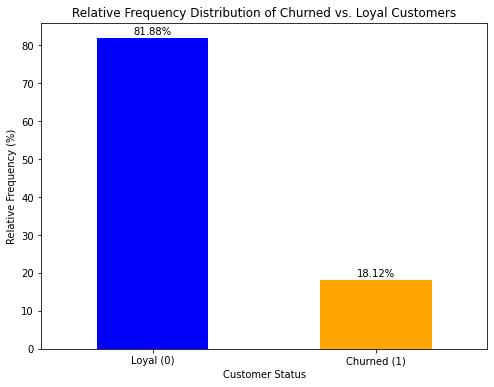

In [12]:
plt.figure(figsize=(8, 6))
churn_counts_frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Relative Frequency Distribution of Churned vs. Loyal Customers')
plt.xlabel('Customer Status')
plt.ylabel('Relative Frequency (%)')
plt.xticks(ticks=[0, 1], labels=['Loyal (0)', 'Churned (1)'], rotation = 0)

# Annotate the bars with the exact relative frequency
for i, val in enumerate(churn_counts_frequency):
    plt.text(i, val+.5 , f'{val:.2f}%', ha='center', va='bottom')

plt.show()


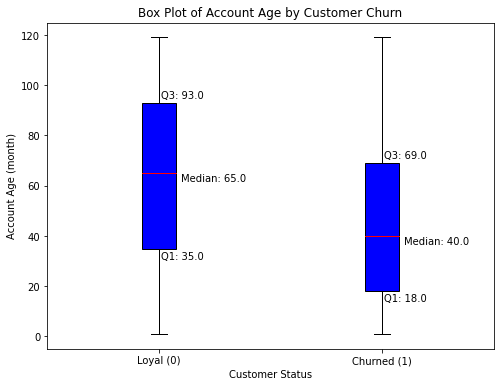

In [13]:
# Separate the data based on 'Churn' value
account_age_loyal = train_df[train_df['Churn'] == 0]['AccountAge']
account_age_churned = train_df[train_df['Churn'] == 1]['AccountAge']

# Create the box plots
plt.figure(figsize=(8, 6))
boxprops = plt.boxplot([account_age_loyal, account_age_churned], labels=['Loyal (0)', 'Churned (1)'],patch_artist=True, 
            boxprops=dict(facecolor='blue'), medianprops=dict(color='red'))

# Function to add text annotations
def add_annotations(bp, data):
    for i in range(len(data)):
        Q1 = np.percentile(data[i], 25)
        median = bp['medians'][i].get_ydata()[0]
        Q3 = np.percentile(data[i], 75)
        
        # Adding annotations
        plt.text(i + 1.01, Q3 + 1, f'Q3: {Q3}', horizontalalignment='left', verticalalignment='bottom')
        plt.text(i + 1.01, Q1 - 1, f'Q1: {Q1}', horizontalalignment='left', verticalalignment='top')
        plt.text(i + 1.1, median , f'Median: {median}', horizontalalignment='left', verticalalignment='top')

# Add annotations to the box plots
add_annotations(boxprops, [account_age_loyal, account_age_churned])

plt.title('Box Plot of Account Age by Customer Churn')
plt.xlabel('Customer Status')
plt.ylabel('Account Age (month)')
plt.show()


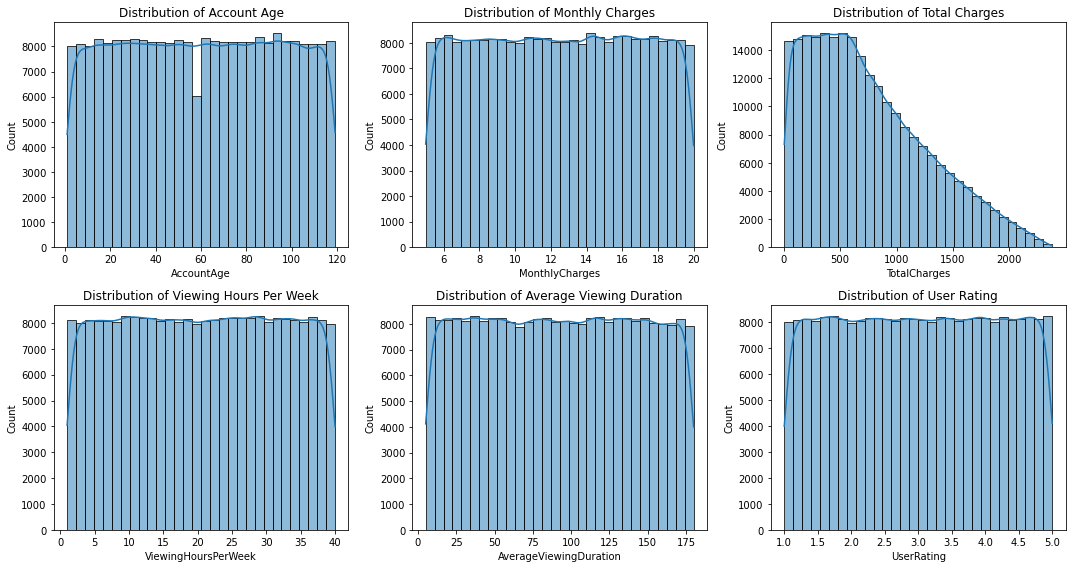

In [14]:
# Descriptive statistics for numerical columns in train_df
train_desc = train_df.describe()

# Plotting distributions of some key numerical features
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.histplot(train_df['AccountAge'], bins=30, kde=True)
plt.title('Distribution of Account Age')

plt.subplot(2, 3, 2)
sns.histplot(train_df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')

plt.subplot(2, 3, 3)
sns.histplot(train_df['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Total Charges')

plt.subplot(2, 3, 4)
sns.histplot(train_df['ViewingHoursPerWeek'], bins=30, kde=True)
plt.title('Distribution of Viewing Hours Per Week')

plt.subplot(2, 3, 5)
sns.histplot(train_df['AverageViewingDuration'], bins=30, kde=True)
plt.title('Distribution of Average Viewing Duration')

plt.subplot(2, 3, 6)
sns.histplot(train_df['UserRating'], bins=30, kde=True)
plt.title('Distribution of User Rating')

plt.tight_layout()
plt.show()

# Handle Missing Values

In [15]:
# Handle missing values (fill with median)
for column in train_df.columns:
    if train_df[column].isnull().sum() > 0:
        train_df[column].fillna(train_df[column].median(), inplace=True)
        test_df[column].fillna(test_df[column].median(), inplace=True)
        
# Check for missing values again
print(train_df.isnull().sum())
print(test_df.isnull().sum())        

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth   

# Feature Selection

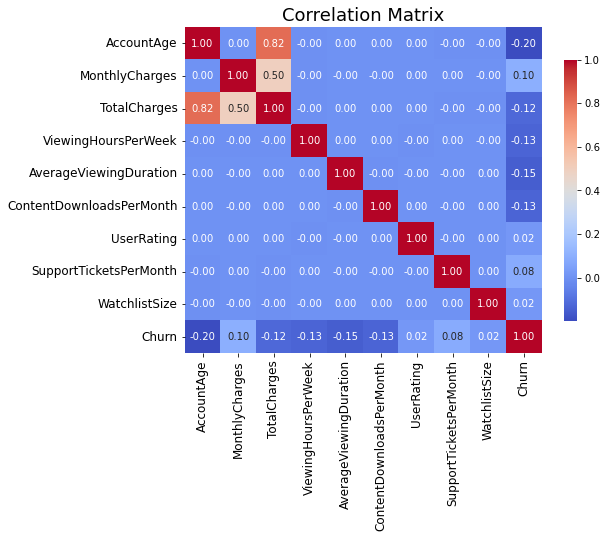

In [16]:
# Correlation matrix
corr_matrix = train_df.corr()
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix', size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [17]:
# Get correlations with the target variable
correlations = corr_matrix['Churn'].abs().sort_values(ascending=False)

# Select features with correlation above a threshold
threshold = 0.1
selected_features = correlations[correlations > threshold].index.drop('Churn').tolist()

print("Selected features based on correlation:")
print(selected_features)


Selected features based on correlation:
['AccountAge', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'ViewingHoursPerWeek', 'TotalCharges', 'MonthlyCharges']


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(train_df[selected_features], train_df['Churn'])

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=selected_features, columns=['importance']).sort_values('importance', ascending=False)

print("Feature importances from RandomForest:")
print(feature_importances)


Feature importances from RandomForest:
                          importance
AverageViewingDuration      0.197960
ViewingHoursPerWeek         0.193587
MonthlyCharges              0.181641
TotalCharges                0.175881
AccountAge                  0.129800
ContentDownloadsPerMonth    0.121131


In [19]:
# use a combination of the previous steps to select features
final_features = feature_importances.index.tolist()

print("Final selected features:")
print(final_features)

# Prepare the training and test data
X_train = train_df[final_features]
y_train = train_df['Churn']
X_test = test_df[final_features]

Final selected features:
['AverageViewingDuration', 'ViewingHoursPerWeek', 'MonthlyCharges', 'TotalCharges', 'AccountAge', 'ContentDownloadsPerMonth']


## Model Building


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Model selection
model = RandomForestClassifier(random_state=42)

# Train the model on the full training data
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
# Predict on training data to evaluate
train_predictions = model.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, train_predictions)
print(f'Training ROC AUC: {train_auc}')

Training ROC AUC: 0.9999999999433038


# Model Evaluation

In [23]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print(f'Cross-validation ROC AUC scores: {cv_scores}')
print(f'Mean CV ROC AUC: {cv_scores.mean()}')


Cross-validation ROC AUC scores: [0.70392886 0.70391588 0.69678561 0.71042043 0.70160368]
Mean CV ROC AUC: 0.7033308912253653


# Prediction

In [25]:
# Predict on test data
test_predictions = model.predict_proba(X_test)[:, 1]

# Prepare submission file
prediction_df = pd.DataFrame({
    'CustomerID': test_df['CustomerID'],
    'predicted_probability': test_predictions
})

print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.12
1,LFR4X92X8H,0.06
2,QM5GBIYODA,0.50
3,D9RXTK2K9F,0.04
4,ENTCCHR1LR,0.27
5,7A88BB5IO6,0.55
6,70OMW9XEWR,0.03
7,EL1RMFMPYL,0.07
8,4IA2QPT6ZK,0.17
9,AEDCWHSJDN,0.27


In [27]:
# Writing to csv
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")
